In [5]:
import pandas as pd

In [9]:
data =pd.read_csv('/content/train.csv')

In [10]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [12]:
data.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [13]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [15]:
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [16]:
data['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [17]:
data['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

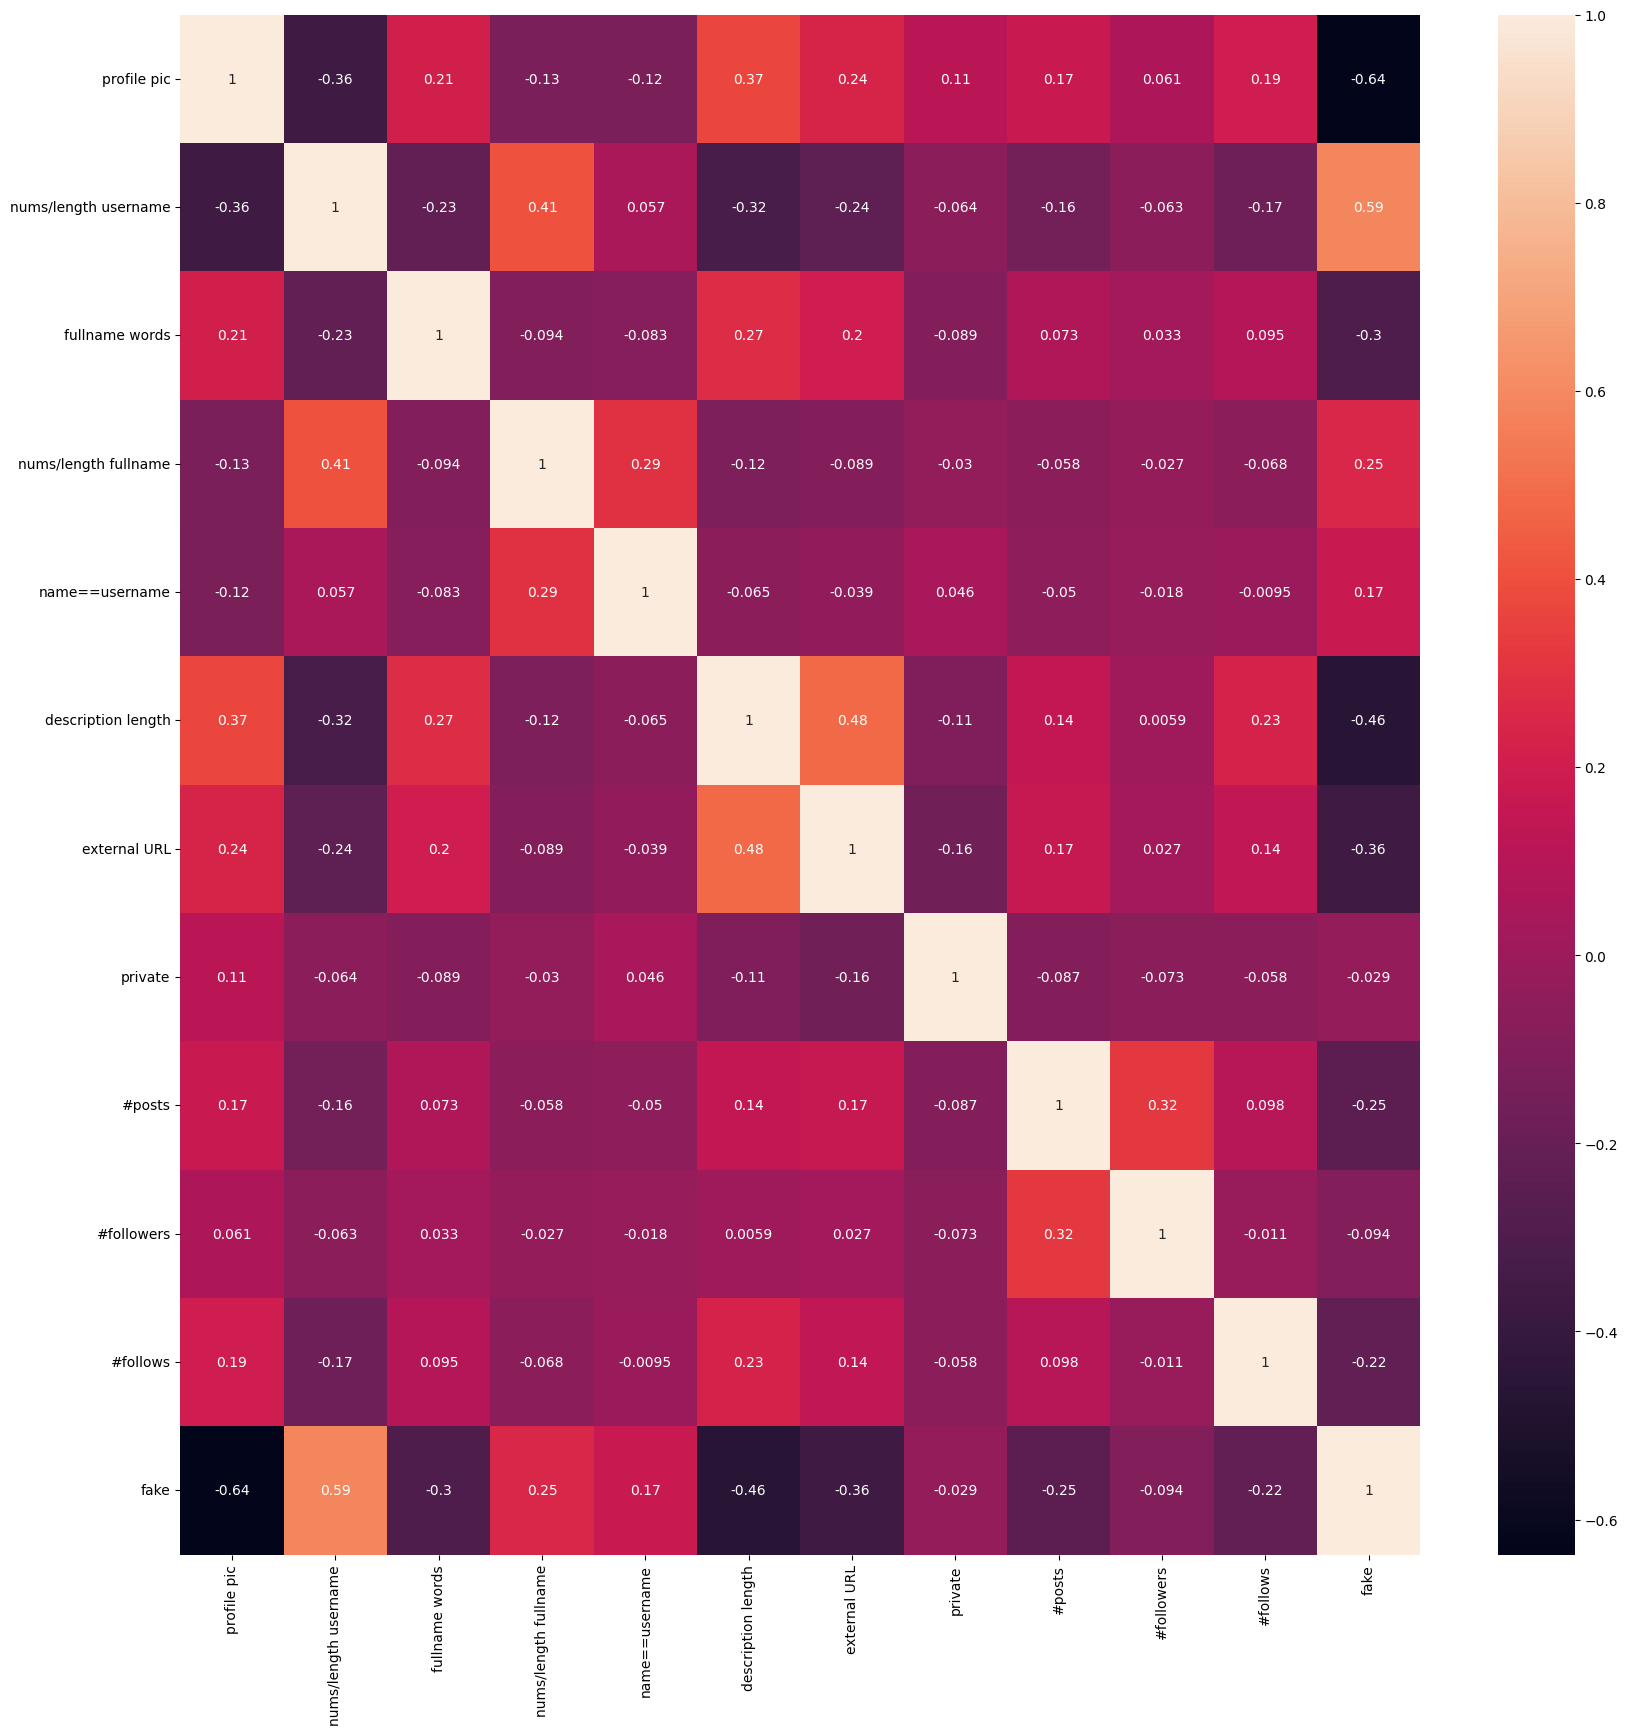

In [23]:
plt.figure(figsize=(20, 20))
cm = data.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

In [28]:
data_test=pd.read_csv('/content/test.csv')

In [29]:
X_train = data.drop(columns = ['fake'])
X_test = data_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [30]:
y_train = data['fake']
y_test = data_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [32]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [33]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [34]:
model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

In [36]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Epoch 1/50
17/17 [==============================] - 2s 20ms/step - loss: 0.6126 - accuracy: 0.6950 - val_loss: 0.4508 - val_accuracy: 0.8448
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.4187 - accuracy: 0.8629 - val_loss: 0.2136 - val_accuracy: 0.8966
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.8977 - val_loss: 0.1956 - val_accuracy: 0.8966
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2713 - accuracy: 0.9035 - val_loss: 0.1514 - val_accuracy: 0.9138
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.9093 - val_loss: 0.1285 - val_accuracy: 0.9310
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2614 - accuracy: 0.9035 - val_loss: 0.1592 - val_accuracy: 0.9138
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2219 - accuracy: 0.9093 - val_loss: 0.1906 - val_accuracy: 0.9138
Epoch 8/50
17/17 [=

In [38]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


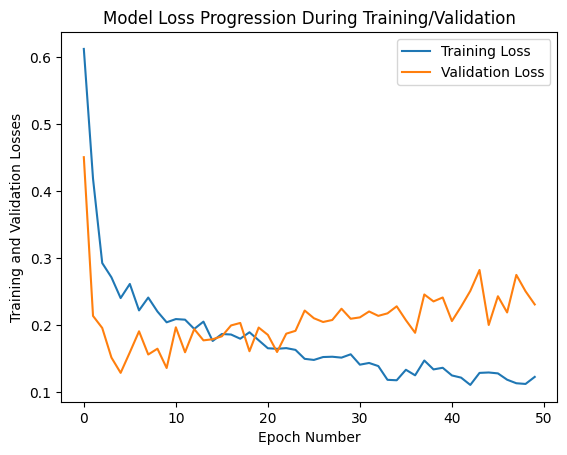

In [39]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [40]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [41]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [42]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        60
           1       0.90      0.90      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



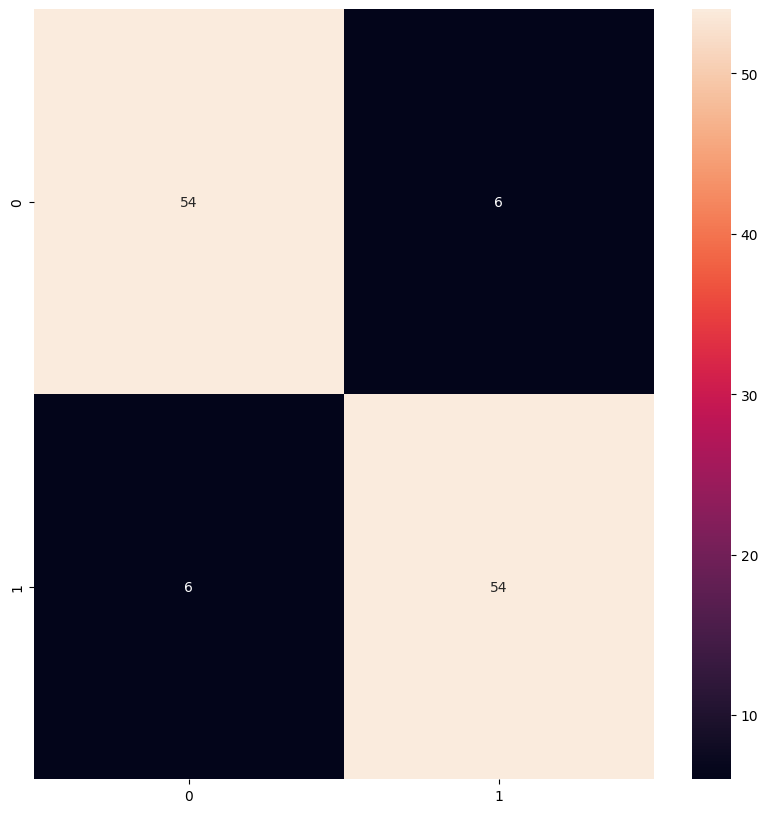

In [43]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
predicted = rf.predict(X_test)

In [47]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

In [48]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [49]:
#Fine-tunning

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [53]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [54]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [55]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=500)

In [56]:
y_pred = best_model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        60
           1       0.90      0.90      0.90        60

   micro avg       0.90      0.90      0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120
 samples avg       0.90      0.90      0.90       120

